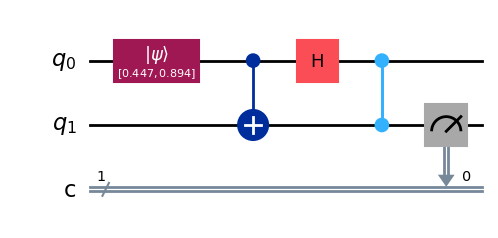

In [1]:
from qiskit import QuantumCircuit
from qiskit import quantum_info as qi
import numpy as np

phi = qi.Statevector([np.sqrt(0.2),np.sqrt(0.8)])

qc =  QuantumCircuit(2,1)
qc.initialize(phi,0)
qc.cx(0,1)
qc.h(0)
qc.cz(0,1)
qc.measure(1,0)

qc.draw('mpl')

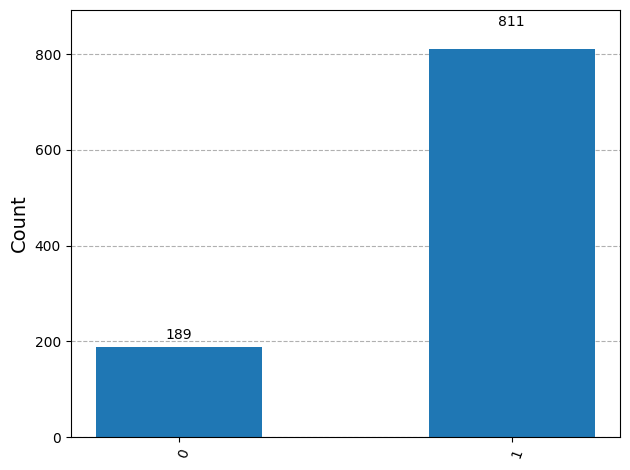

In [3]:
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

aer_simulator = AerSimulator()

sampler_aer = SamplerV2(mode = aer_simulator)

qc_tr = transpile(qc, aer_simulator)

job_aer = sampler_aer.run([(qc_tr,None,1000)])

results_aer = job_aer.result()

counts_aer = results_aer[0].data.c.get_counts()

plot_histogram(counts_aer)

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
token = "nDLD07y8TqS3jvE-zdQ3RFLExYFd4E89wPIw4qV_tclN"
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum_platform", # `channel` distinguishes between different account types.
  instance="crn:v1:bluemix:public:quantum-computing:us-east:a/2f903a94d6564bb2a042b9d46bda122d:6c4b797f-5ec9-4077-b5fa-bf87972e20d0::", # Optionally copy the instance CRN or name from the Instance section on the dashboard.
  name="Faryad-free-ibm", # Optionally name this set of credentials.
  overwrite=True # Only needed if you already have Cloud credentials.
)

In [6]:
# Load saved credentials if you specified a name
ibm_service = QiskitRuntimeService(name="Faryad-free-ibm")
ibmq_comp = ibm_service.backend('ibm_torino')

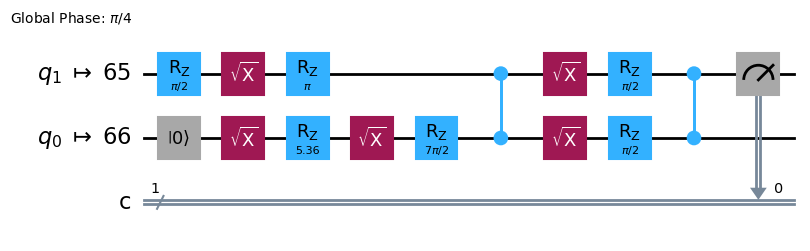

In [7]:
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit.visualization import plot_histogram


sampler_ibm = SamplerV2(mode = ibmq_comp)

qc_ibm_tr = transpile(qc, ibmq_comp)

qc_ibm_tr.draw('mpl')


In [8]:
job_ibm = sampler_ibm.run([(qc_ibm_tr,None,1000)])

print(job_ibm.job_id())

d1jmocj9fb3c73efcf5g


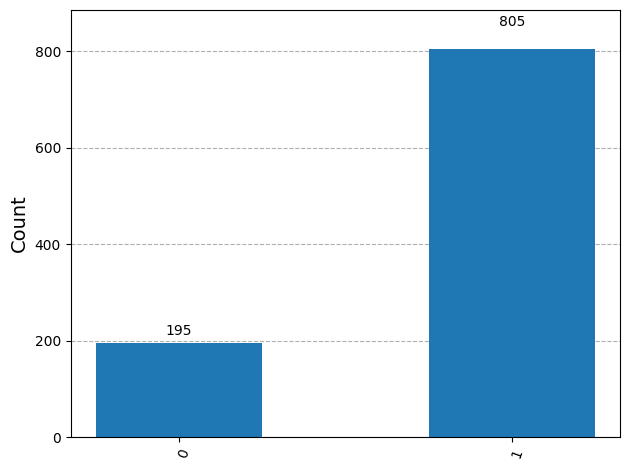

In [9]:
job_id  = 'd1jmocj9fb3c73efcf5g'
job_ibm = ibm_service.job(job_id)

result_ibm = job_ibm.result()
counts_ibm = result_ibm[0].data.c.get_counts()

plot_histogram(counts_ibm)

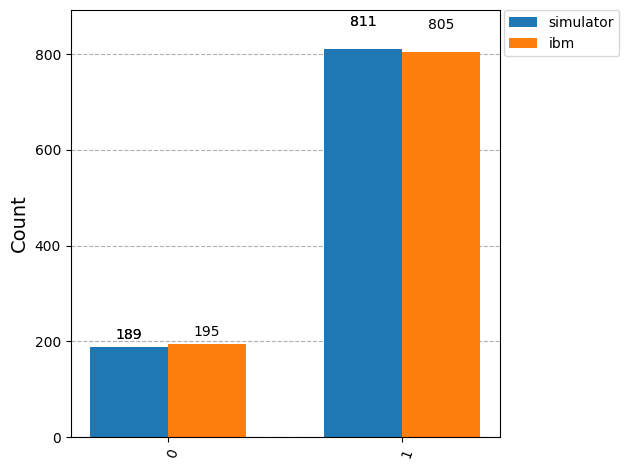

In [10]:
plot_histogram([counts_aer,counts_ibm],legend = ['simulator', 'ibm'])